In [4]:
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
d = pandas.read_csv('cattleTS.csv')
print(d.shape)
print(d.columns)

(23639, 10)
Index(['geographicAreaFS', 'Geographic Area', 'measuredItemFS', 'Item',
       'measuredElementFS', 'Element', 'timePointYears', 'Year', 'Value',
       'Status'],
      dtype='object')


Let's look at Argentina's time series

In [5]:
argentina = d[d['Geographic Area'] == 'Argentina']
print(argentina.shape)
argentina

(150, 10)


,geographicAreaFS,Geographic Area,measuredItemFS,Item,measuredElementFS,Element,timePointYears,Year,Value,Status
624,9,Argentina,866,Cattle,11,Initial Existence,2013,2013,51095000.00000,*
625,9,Argentina,866,Cattle,11,Initial Existence,2012,2012,49597000.00000,*
626,9,Argentina,866,Cattle,11,Initial Existence,2011,2011,46000000.00000,F
627,9,Argentina,866,Cattle,11,Initial Existence,2010,2010,48949743.00000,NaN
628,9,Argentina,866,Cattle,11,Initial Existence,2009,2009,54463871.00000,NaN
629,9,Argentina,866,Cattle,11,Initial Existence,2008,2008,57583122.00000,NaN
630,9,Argentina,866,Cattle,11,Initial Existence,2007,2007,58722108.00000,NaN
631,9,Argentina,866,Cattle,11,Initial Existence,2006,2006,58293607.00000,NaN
632,9,Argentina,866,Cattle,11,Initial Existence,2005,2005,57033527.00000,NaN
633,9,Argentina,866,Cattle,11,Initial Existence,2004,2004,56844020.00000,NaN


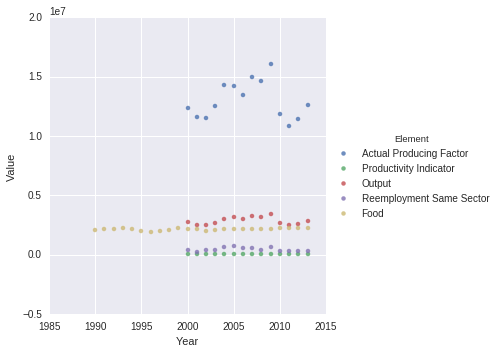

In [6]:
%matplotlib inline
to_plot = argentina[argentina['Item'] != 'Cattle']
sns.lmplot(x='Year', y='Value', data=to_plot, hue='Element', fit_reg=False)

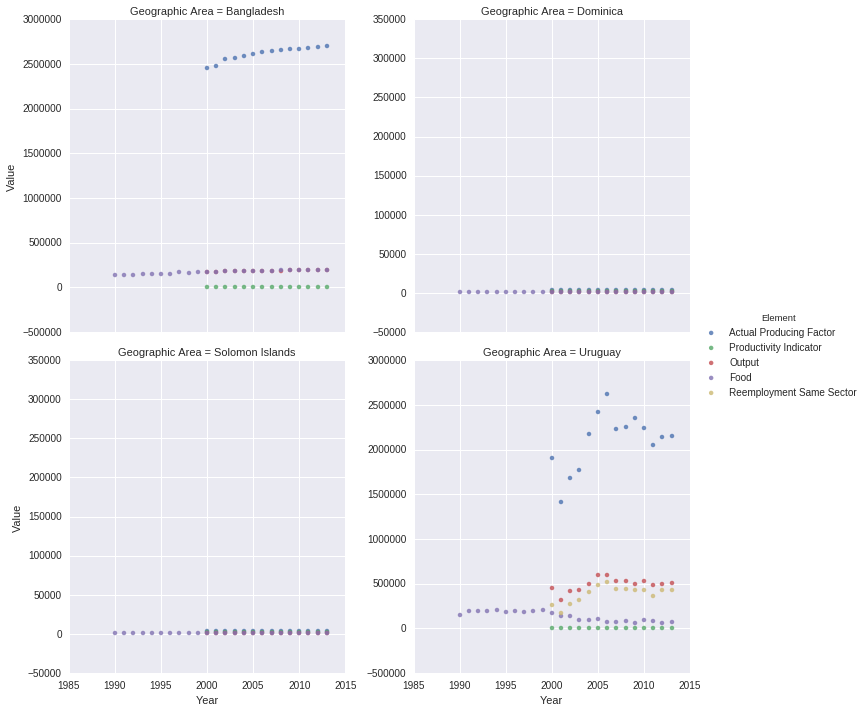

In [7]:
# Let's plot a sample of 4 countries
to_plot = d[d['Item'] != 'Cattle']
countries = np.random.choice(d['Geographic Area'], size=4)
filter = [(i in countries) for i in to_plot['Geographic Area']]
to_plot = to_plot[filter]
sns.lmplot(x='Year', y='Value', data=to_plot, hue='Element',
           col='Geographic Area', col_wrap=2, fit_reg=False, sharey = False)

In [8]:
def linear_variance(y):
    x = np.arange(y.size)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=x, y=y)
    return(np.var(y)*(1-r_value**2))

y = np.random.normal(size=10000)*10
print(linear_variance(y))
y = y + np.arange(y.size)
print(linear_variance(y))

98.9179344968
98.9179344953


In [9]:
grouped_data = d[d['Item'] != 'Cattle'].groupby(by=('Geographic Area', 'Element'))
new_data = grouped_data['Value'].agg(linear_variance)

In [10]:
new_data

Geographic Area       Element                 
Afghanistan           Actual Producing Factor     3.464493e+09
                      Food                        3.647966e+08
                      Output                      1.126234e+08
                      Productivity Indicator      1.188002e-01
Albania               Actual Producing Factor     6.529769e+08
                      Food                        1.528532e+07
                      Output                      1.306498e+07
                      Productivity Indicator      8.752746e+02
Algeria               Actual Producing Factor     8.390091e+08
                      Food                        3.887204e+07
                      Output                      4.070496e+07
                      Productivity Indicator      2.604068e+03
American Samoa        Actual Producing Factor     1.305808e+00
                      Food                        1.451546e+03
                      Output                      2.938069e-02
        

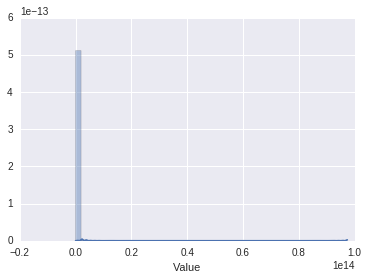

In [11]:
sns.distplot(a = new_data)

In [12]:
idx_array = [list('ababab'), list('xxyyzz')]
s1 = pandas.Series(np.arange(6),index=idx_array)
print(s1)
new_idx = [list('aaabbb'), list('xyzxyz')]
s1.reindex(new_idx)

a  x    0
b  x    1
a  y    2
b  y    3
a  z    4
b  z    5
dtype: int64


a  x    0
   y    2
   z    4
b  x    1
   y    3
   z    5
dtype: int64

In [13]:
idx_array = [list('ababab'), list('xxyyzz')]
s1 = pandas.Series(np.arange(6),index=idx_array)
print(s1.index)
new_idx = [(s1.index.levels[0][i], s1.index.levels[1][j])
           for i in np.arange(2)
           for j in np.arange(3)]
print(s1)
s1.reindex(new_idx)

MultiIndex(levels=[['a', 'b'], ['x', 'y', 'z']],
           labels=[[0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 2, 2]])
a  x    0
b  x    1
a  y    2
b  y    3
a  z    4
b  z    5
dtype: int64


a  x    0
   y    2
   z    4
b  x    1
   y    3
   z    5
dtype: int64

In [43]:
new_idx = [(i, j) for j in new_data.index.levels[1]
                  for i in new_data.index.levels[0]]
new_data = new_data.reindex(new_idx)

In [60]:
# Food is slightly more variable than production (output).
# This implies production should be estimated, not food!!
group_var = [j[1] for j in new_data.index]
new_data.groupby(by=group_var).mean()

Actual Producing Factor     5.061529e+11
Food                        1.248461e+10
Initial Existence           0.000000e+00
Output                      1.197126e+10
Productivity Indicator      1.142452e+04
Reemployment Same Sector    2.593526e+09
Name: Value, dtype: float64

218


/home/josh/anaconda3/lib/python3.5/site-packages/pandas/core/index.py:4513: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_value(s, k)


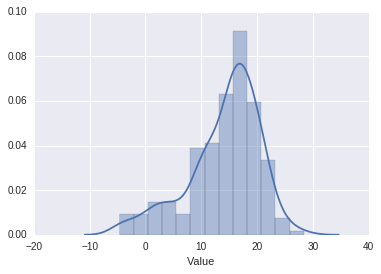

In [117]:
filter_output = [i == 'Output' for i in group_var]
filter_food = [i == 'Food' for i in group_var]
print(sum(filter_food))
filter_null = pandas.notnull(new_data)
filter_output = [filter_output[i] and filter_null[i]
                 for i in np.arange(len(filter_output))]
filter_food = [filter_food[i] and filter_null[i]
                 for i in np.arange(len(filter_food))]
#sns.distplot(new_data)
#new_data[filter_output]
sns.distplot(np.log(new_data[filter_output] + .01))

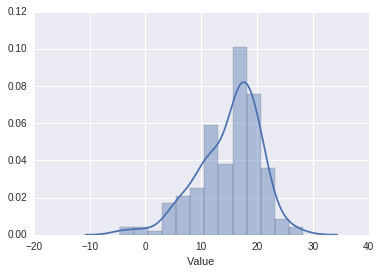

In [116]:
sns.distplot(np.log(new_data[filter_food] + .01))

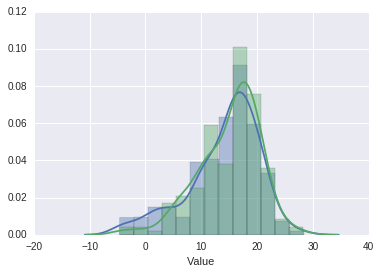

In [118]:
sns.distplot(np.log(new_data[filter_output] + .01))
sns.distplot(np.log(new_data[filter_food] + .01))